In [138]:
import pandas as pd

In [139]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [140]:
#data_df.head()

In [141]:
#len(data_df)

In [142]:
#print(data_df.info())

Correcting the data type

In [143]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
#data_df.dtypes

In [144]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [145]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [146]:
#TO CHECK age_years for <20 and >60
data_df['age_years'].describe()


count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [147]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [148]:
#Drop it first, to change the top codes!!!
data_df.columns
#data_df.drop(columns=['age_binned_<20s','age_binned_>60s'], inplace=True)


Index(['date', 'country', 'id', 'active', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'bmi', 'age_binned_20s', 'age_binned_30s',
       'age_binned_40s', 'age_binned_50s', 'age_binned_60s'],
      dtype='object')

In [149]:
#Further binning Blood Pressure
#data_df.ap_hi.describe()

In [150]:
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])

        if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_normal'] = 1
        elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_elevated'] = 1
        elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
            df.loc[x, 'bp_hypertension1'] = 1
        else:
            df.loc[x, 'bp_hypertension2'] = 1
    
    return df

    #print(df.ap_hi[1])


#data_df.drop(columns=['bp_normal','bp_elevated','bp_hypertension1','bp_hypertension2'])        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)

data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)


In [151]:
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

Unique values for column 'bp_normal': [0 1]
Unique values for column 'bp_elevated': [0 1]
Unique values for column 'bp_hypertension1': [1 0]
Unique values for column 'bp_hypertension2': [0 1]


In [152]:
data_df = data_df[data_df['bmi']< 200]

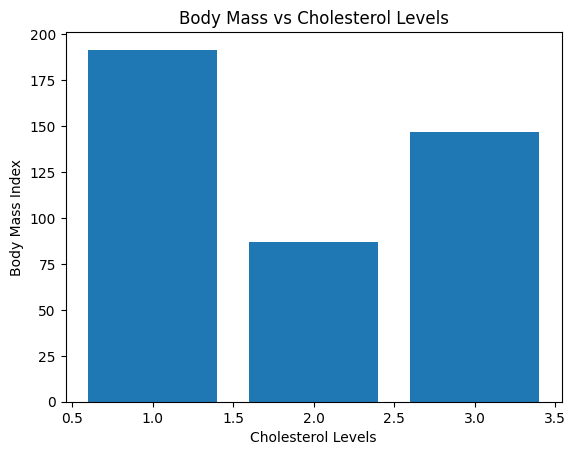

In [153]:
import matplotlib.pyplot as plt

cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

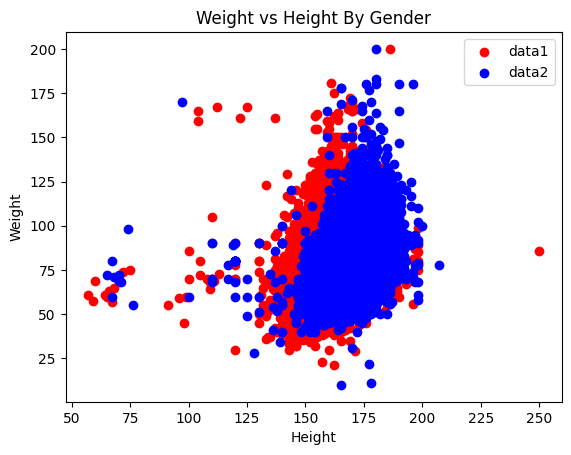

In [154]:
dataset1 = data_df[data_df['gender'] == 1]
dataset2 = data_df[data_df['gender'] == 2]

#Plotting
plt.scatter(dataset1['height'], dataset1['weight'], color='red', label='data1')
plt.scatter(dataset2['height'], dataset2['weight'], color='blue', label='data2')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height By Gender')

plt.legend()
plt.show()

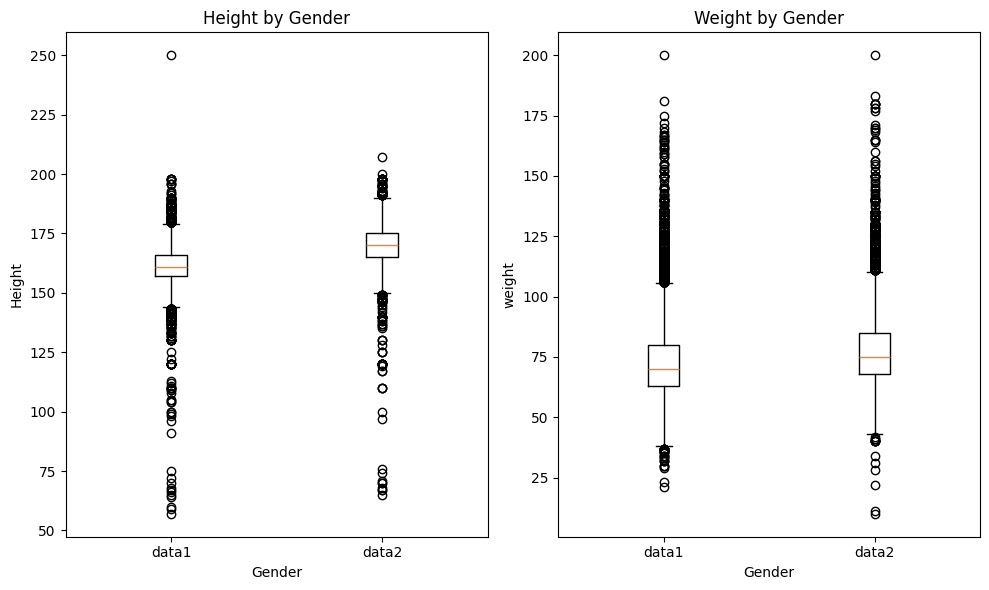

In [155]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [156]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


In [157]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



In [158]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


In [159]:
#data_df.country.unique()

In [160]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

In [161]:
#data_df.max()

In [162]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


In [163]:
#data_df['gluc'].unique()

data_df.corr()

#data_df['age_binned_>60s'].unique()

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
date,1.000000,-0.001226,0.000686,0.008738,0.000010,0.003996,-0.001288,-0.002037,-0.001981,0.005717,...,0.002007,-0.002007,-0.003219,0.004204,-0.000957,-0.008630,0.003226,0.004040,-0.003870,0.004386
id,-0.001226,1.000000,0.003774,0.001201,-0.003471,-0.003656,-0.001642,0.003822,0.000163,-0.004940,...,0.003475,-0.003475,0.005823,0.001260,-0.005281,0.001500,0.002360,-0.002843,0.001975,0.000911
active,0.000686,0.003774,1.000000,0.025483,-0.006277,0.025844,-0.017023,-0.035669,-0.016146,0.003235,...,0.005887,-0.005887,0.013070,-0.004684,-0.005912,-0.002416,-0.009925,0.009070,-0.001681,-0.001033
alco,0.008738,0.001201,0.025483,1.000000,0.094608,0.340128,0.067242,-0.007324,0.015673,-0.001561,...,0.170959,-0.170959,0.016922,0.039397,-0.043611,-0.003491,0.031644,-0.020610,0.001960,-0.000061
height,0.000010,-0.003471,-0.006277,0.094608,1.000000,0.189037,0.295286,-0.010511,-0.279245,0.004243,...,0.500380,-0.500380,-0.040964,-0.023518,0.048741,-0.013660,-0.012535,0.019328,-0.001287,0.001658
smoke,0.003996,-0.003656,0.025844,0.340128,0.189037,1.000000,0.067607,-0.015529,-0.030168,-0.002035,...,0.338190,-0.338190,-0.002160,0.024602,-0.017870,-0.013050,0.016093,-0.002113,0.003906,0.000015
weight,-0.001288,-0.001642,-0.017023,0.067242,0.295286,0.067607,1.000000,0.181708,0.788254,-0.001912,...,0.155758,-0.155758,0.114389,0.068114,-0.138037,0.068079,0.095234,-0.120353,0.000871,-0.003402
disease,-0.002037,0.003822,-0.035669,-0.007324,-0.010511,-0.015529,0.181708,1.000000,0.172438,-0.006543,...,0.008131,-0.008131,0.191780,0.081456,-0.205532,0.070204,0.052851,-0.090855,-0.001011,-0.003499
bmi,-0.001981,0.000163,-0.016146,0.015673,-0.279245,-0.030168,0.788254,0.172438,1.000000,-0.003753,...,-0.099533,0.099533,0.124868,0.070830,-0.147895,0.068008,0.092037,-0.117956,0.002049,-0.002780
age_binned_20s,0.005717,-0.004940,0.003235,-0.001561,0.004243,-0.002035,-0.001912,-0.006543,-0.003753,1.000000,...,-0.000223,0.000223,-0.002363,-0.002602,0.003796,-0.001880,-0.001853,0.002753,0.000979,0.006777


Text(0.5, 1.0, 'Correlation Heatmap')

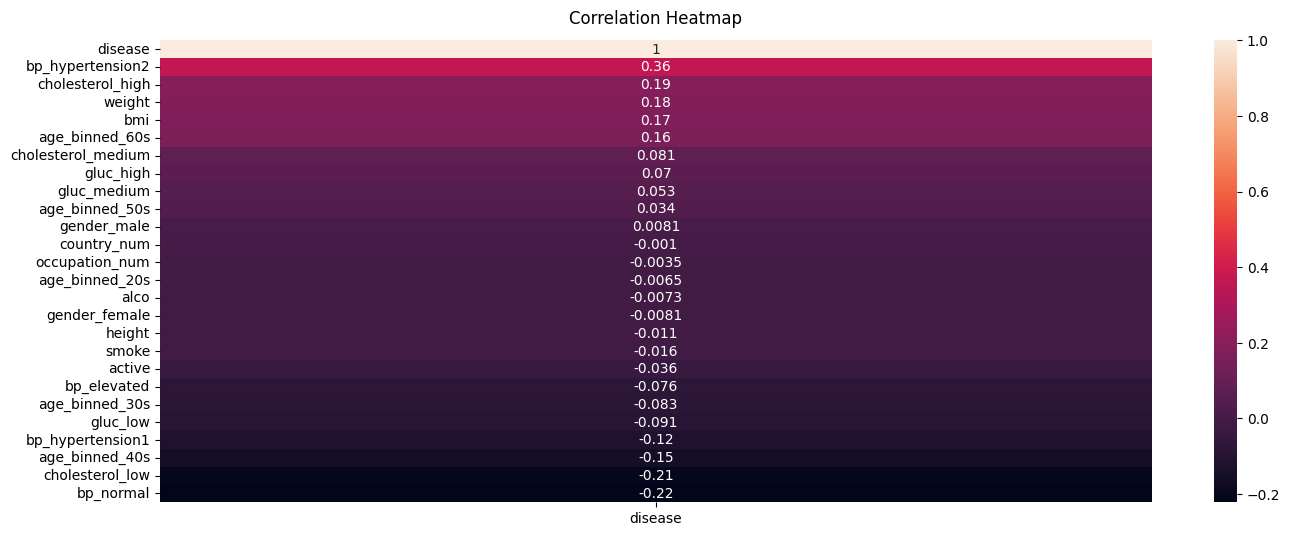

In [164]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [168]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [291]:
# Feature Selection
selected_df = iddate_removed_df[iddate_removed_df['age_binned_30s'] == 1]

X = selected_df.drop(columns=['disease', 'bmi', 'country_num','occupation_num'], axis = 1)
y = selected_df['disease']

In [ ]:
#X.head(3)

In [288]:
X

,active,alco,height,smoke,weight,age_binned_20s,age_binned_30s,age_binned_40s,age_binned_50s,age_binned_60s,...,bp_hypertension2,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,occupation_num
14,1,1,181,1,95.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,3
25,1,0,153,0,65.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
28,1,0,166,0,66.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,4
53,1,0,165,0,77.0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,5
106,1,0,162,0,60.0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,1,0,163,0,58.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,3
69844,0,0,165,0,62.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
69847,0,0,168,0,79.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,2
69928,1,0,160,0,55.0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,7


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [290]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=5000)

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

accuracy = metrics.accuracy_score(predictions, y_test)

print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

The Accuracy of the logistic regression model is:  81.86915887850468 %


In [259]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = metrics.accuracy_score(pred, y_test)

print("The accuracy of the KNN model is: ", acc*100, "%")

The accuracy of the KNN model is:  58.272369161508166 %


In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [261]:
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      5156
           1       0.76      0.56      0.64      5506

    accuracy                           0.68     10662
   macro avg       0.70      0.68      0.68     10662
weighted avg       0.70      0.68      0.67     10662



In [ ]:
data_df

In [ ]:
#data_df[data_df['bmi'] > 200]